# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

**Names and groups** 
\
Mateo Laforge C1 \
Mohamed Amine Hassouna C1


In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [2]:
baby_trees = {"max_depth": 1}  #Produces a very shallow tree (only one split), leading to a simple model.
ten_cluster_trees = {"min_samples_leaf": 10, "max_depth": 6} #Encourages broader leaves with at least 10 samples, reducing overfitting.
default_trees = {"max_depth": 6} # A classic depth-limited tree with default settings.
biased_trees = {"class_weight": {0: 0.001, 1: 1000}, "max_depth": 6}  #Heavily favors class 1 (recidivism), useful in imbalanced scenarios.
random_trees = {"splitter": "random", "max_depth": 6} #Uses random splits, leading to different structures than deterministic splits.
purned_trees = {"ccp_alpha": 0.01, "max_depth": 6} # Adds cost-complexity pruning to simplify the tree and reduce overfitting by penalizing complexity.

Q2: Train a decision tree for each of the previous configurations on the full dataset

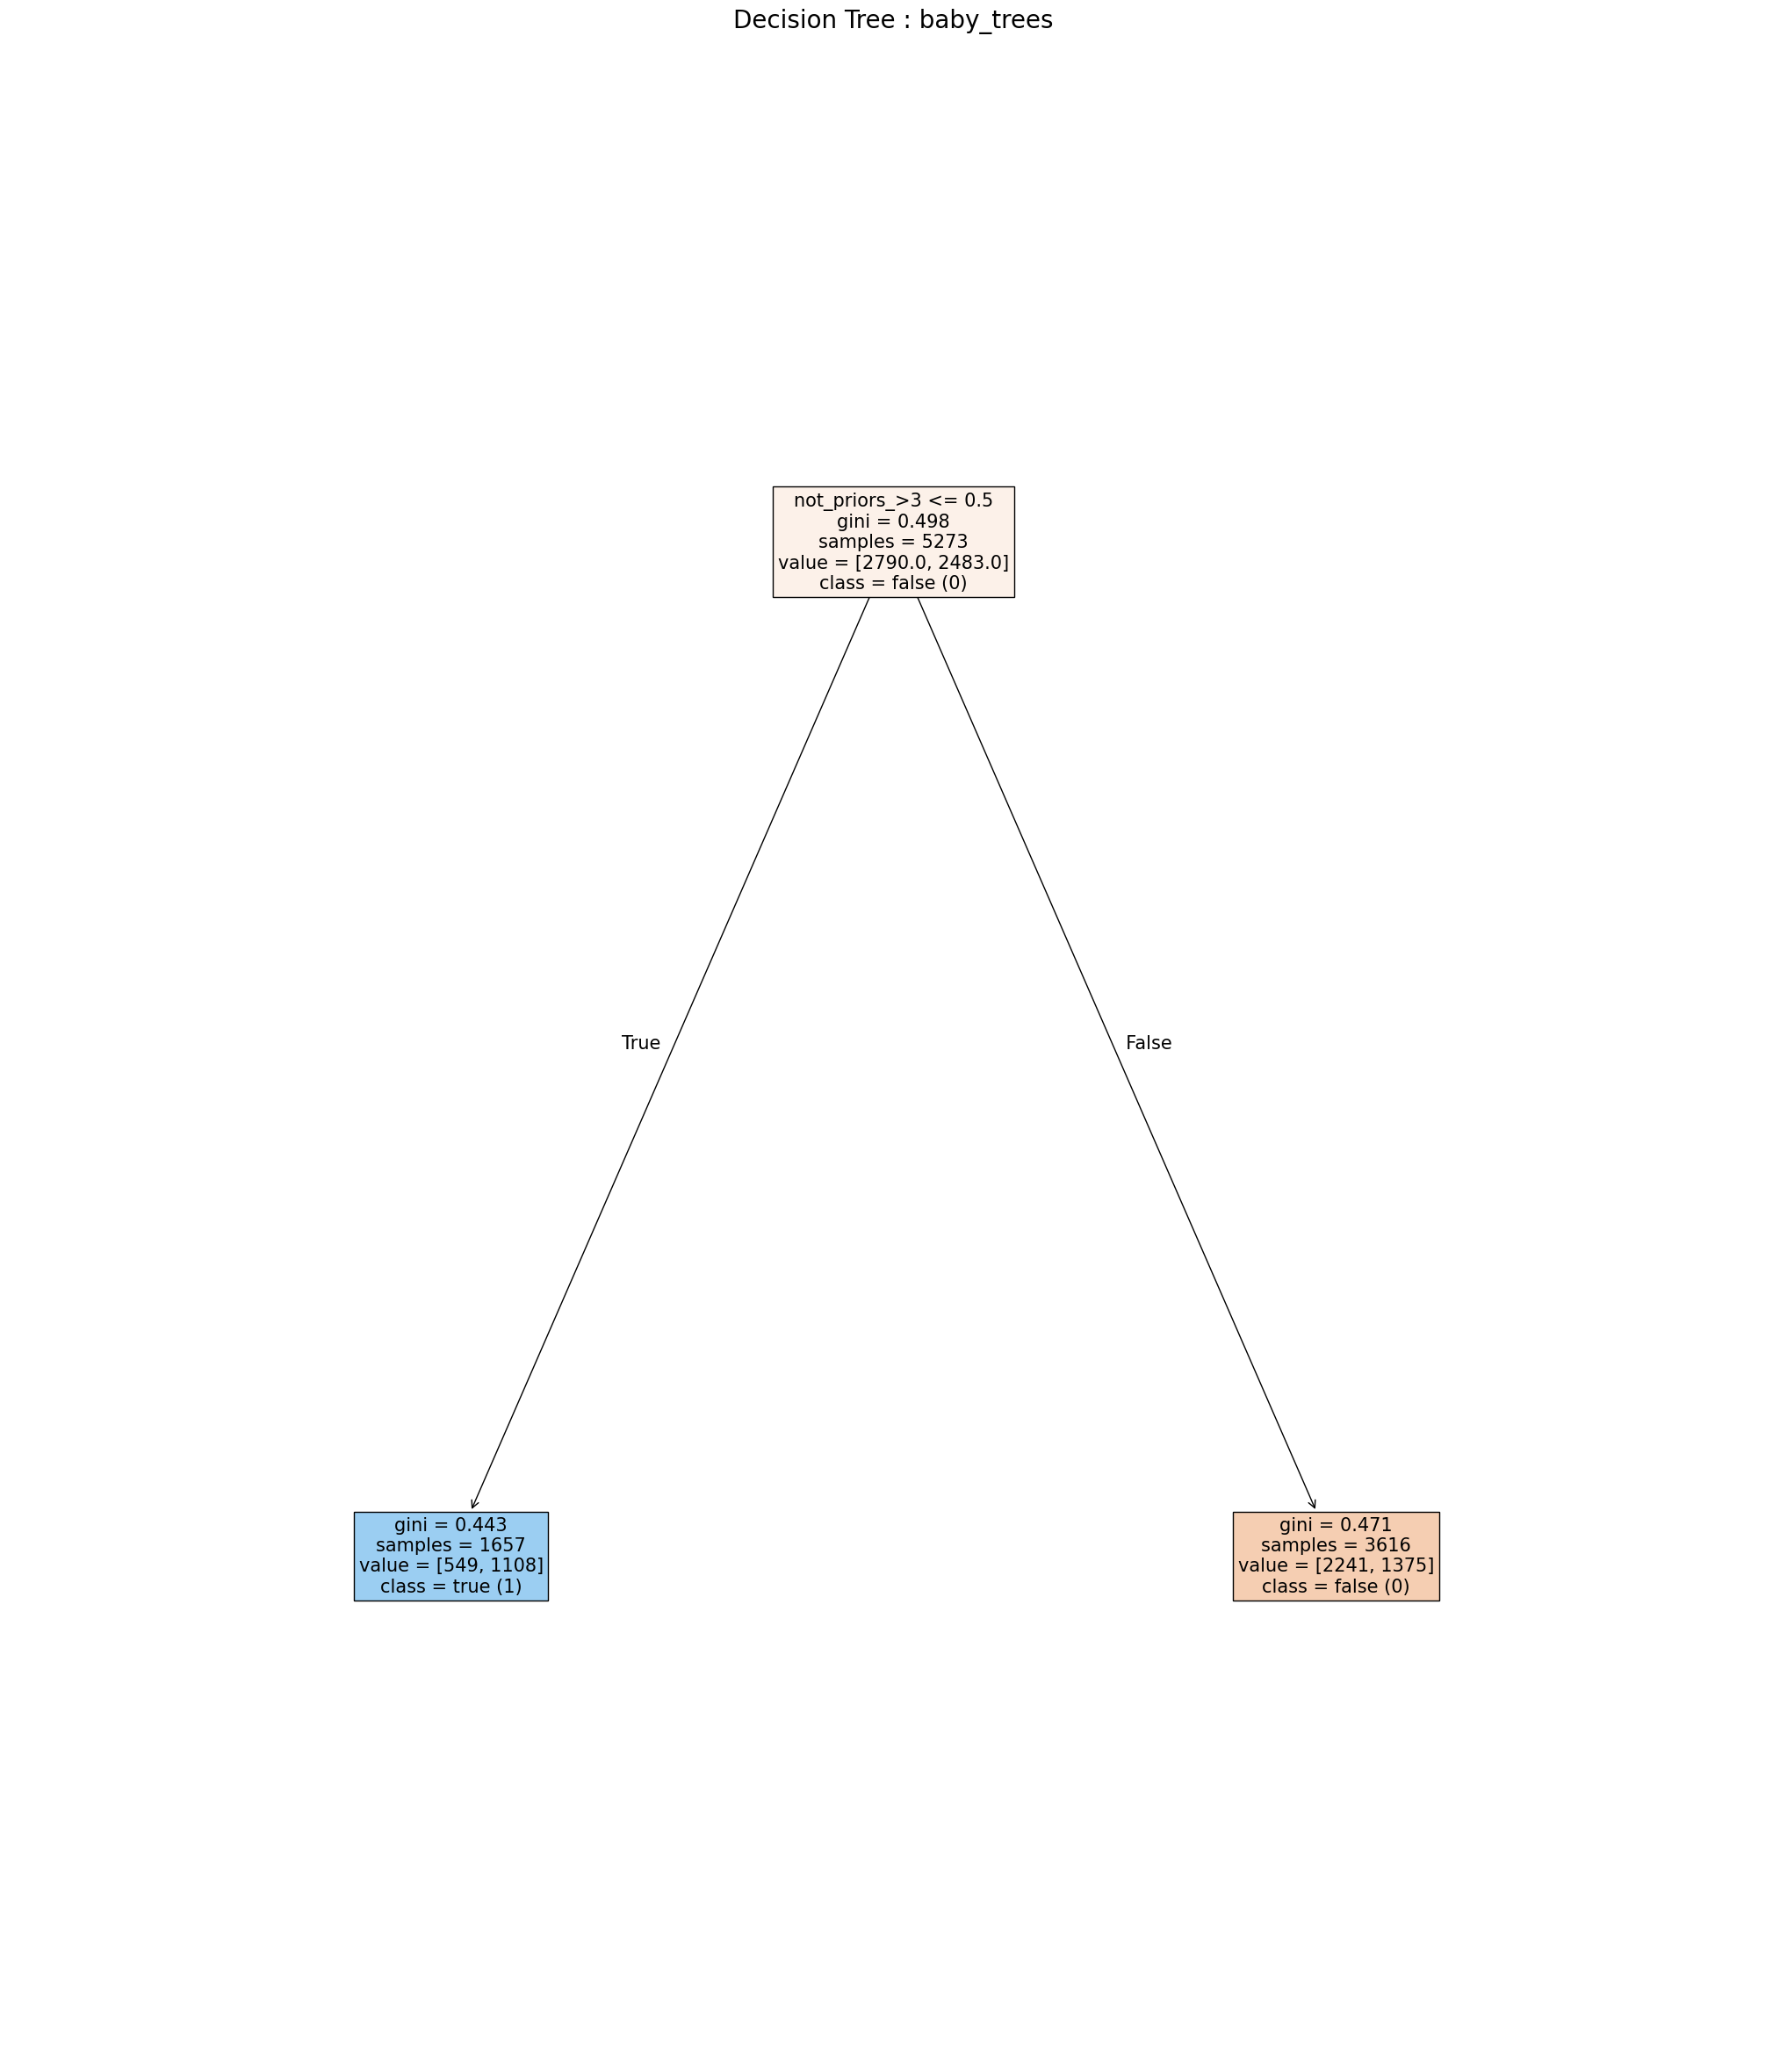

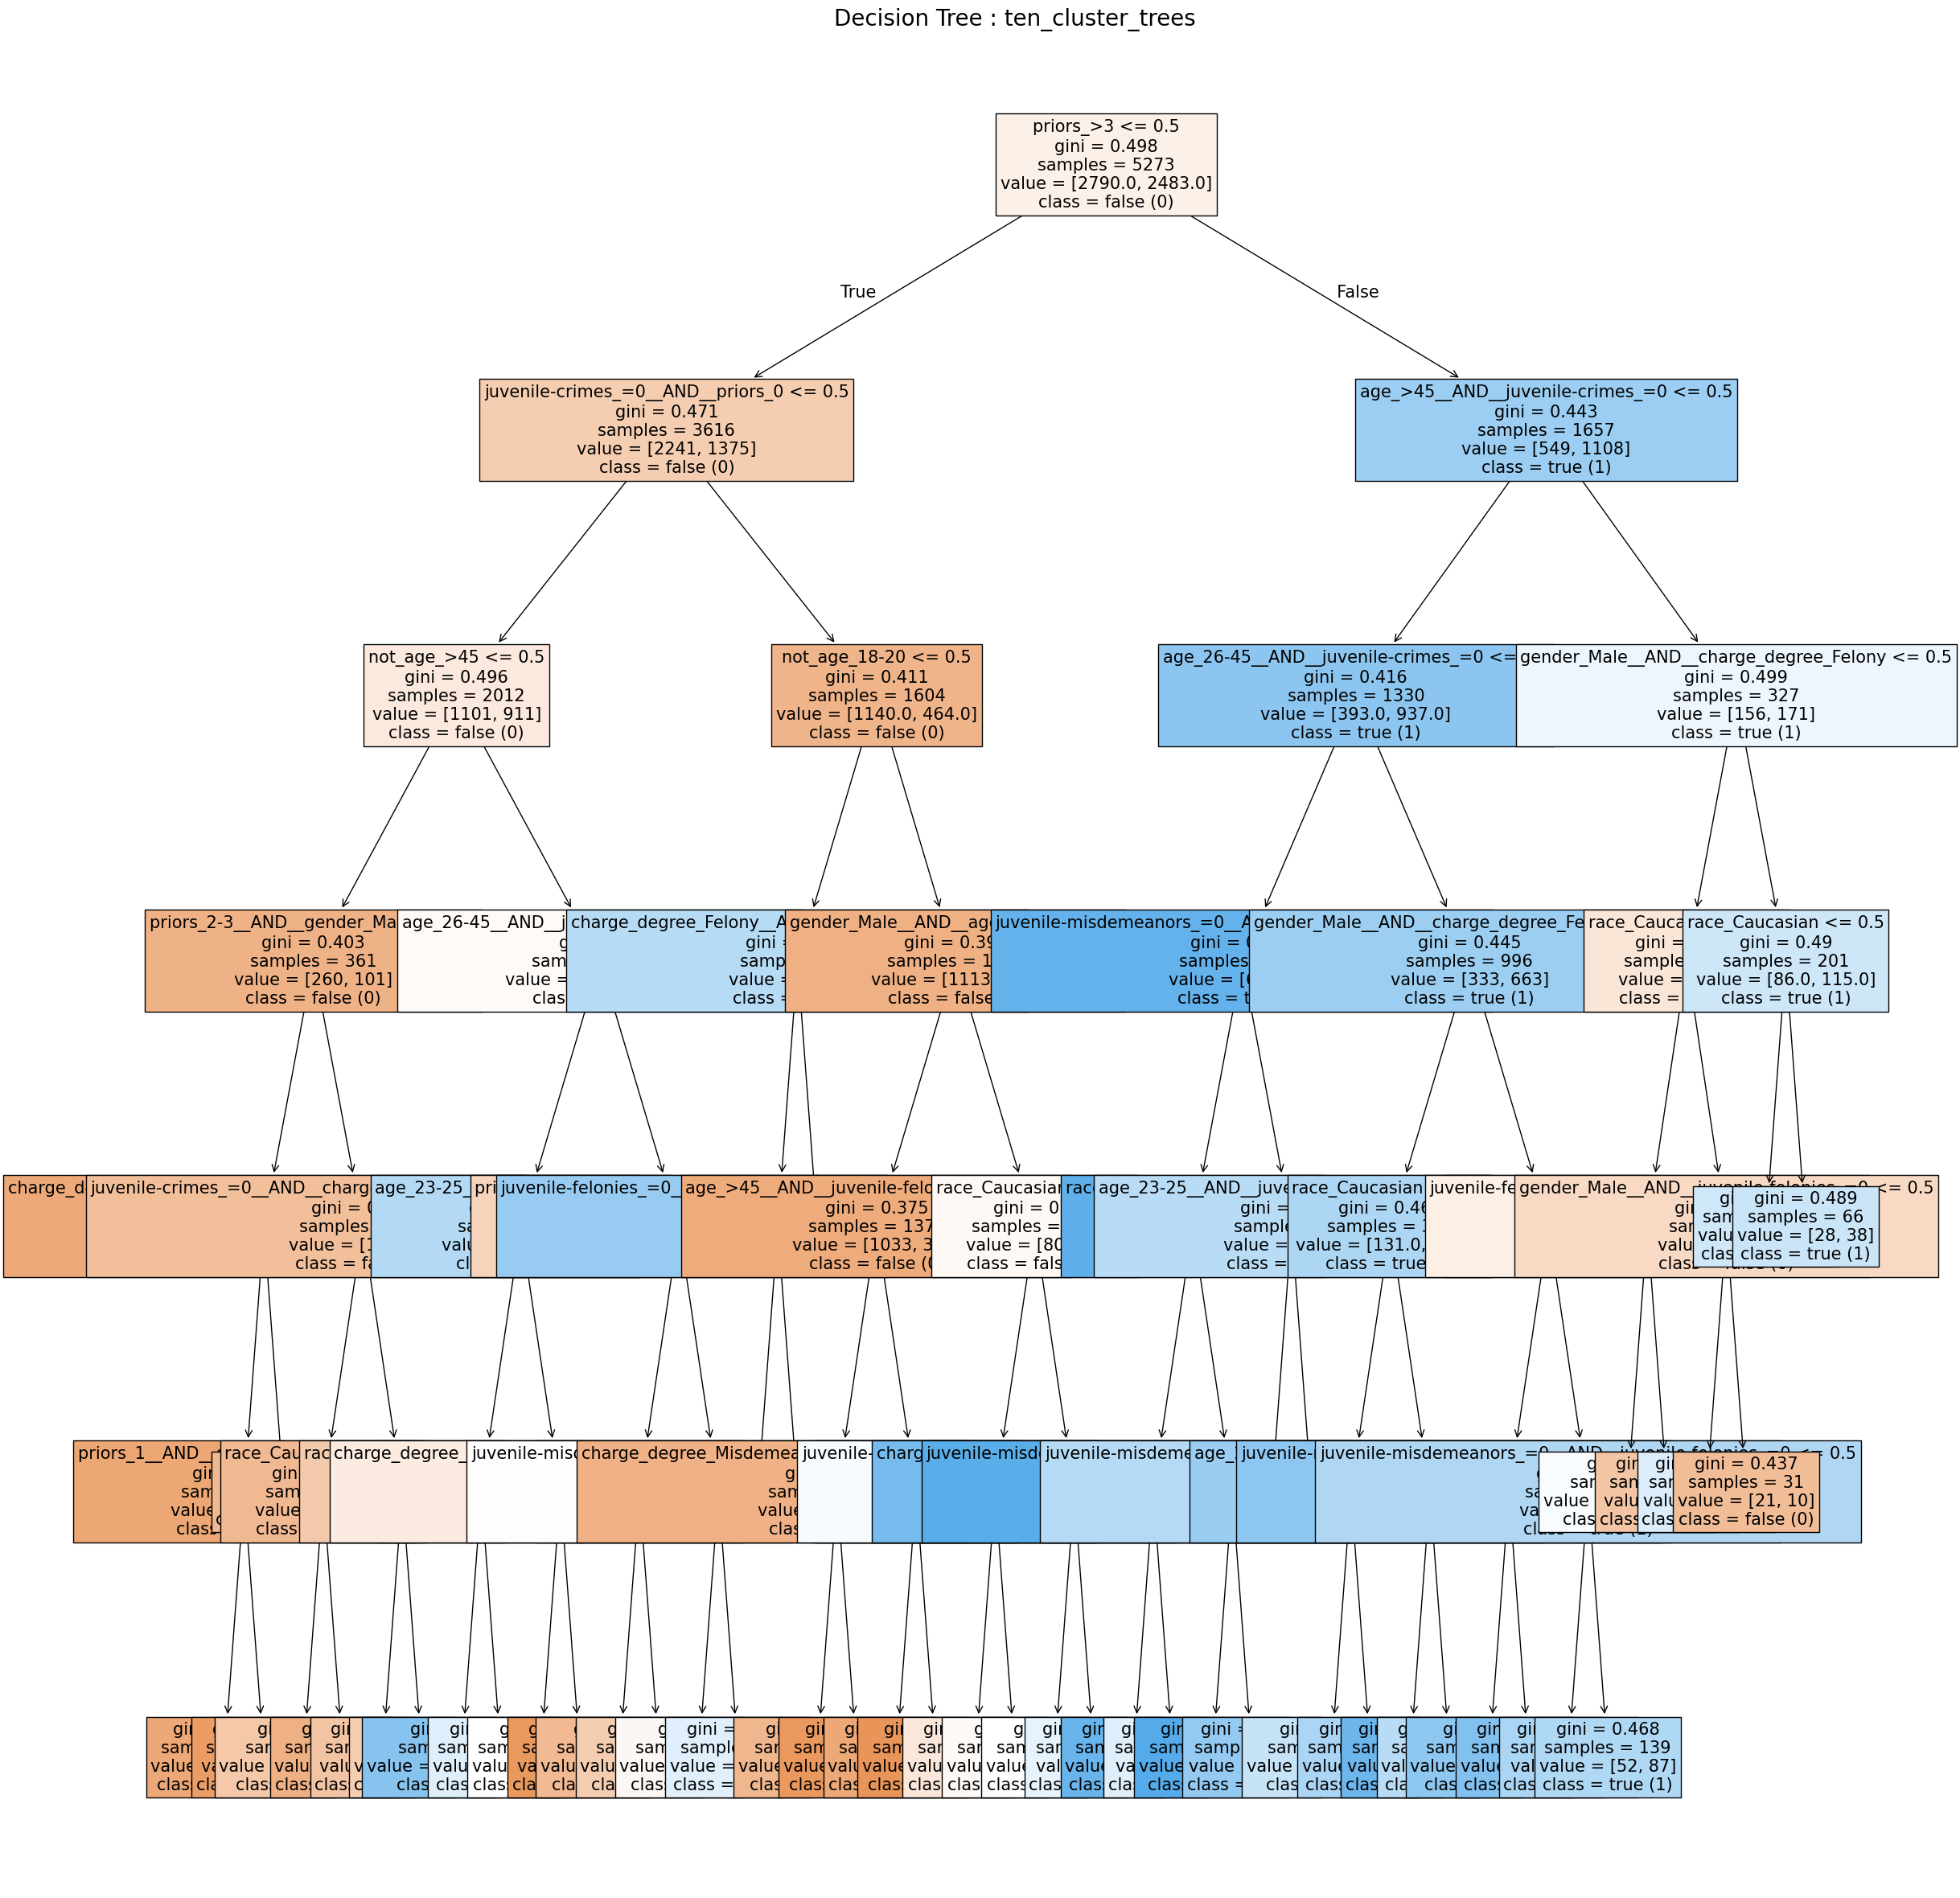

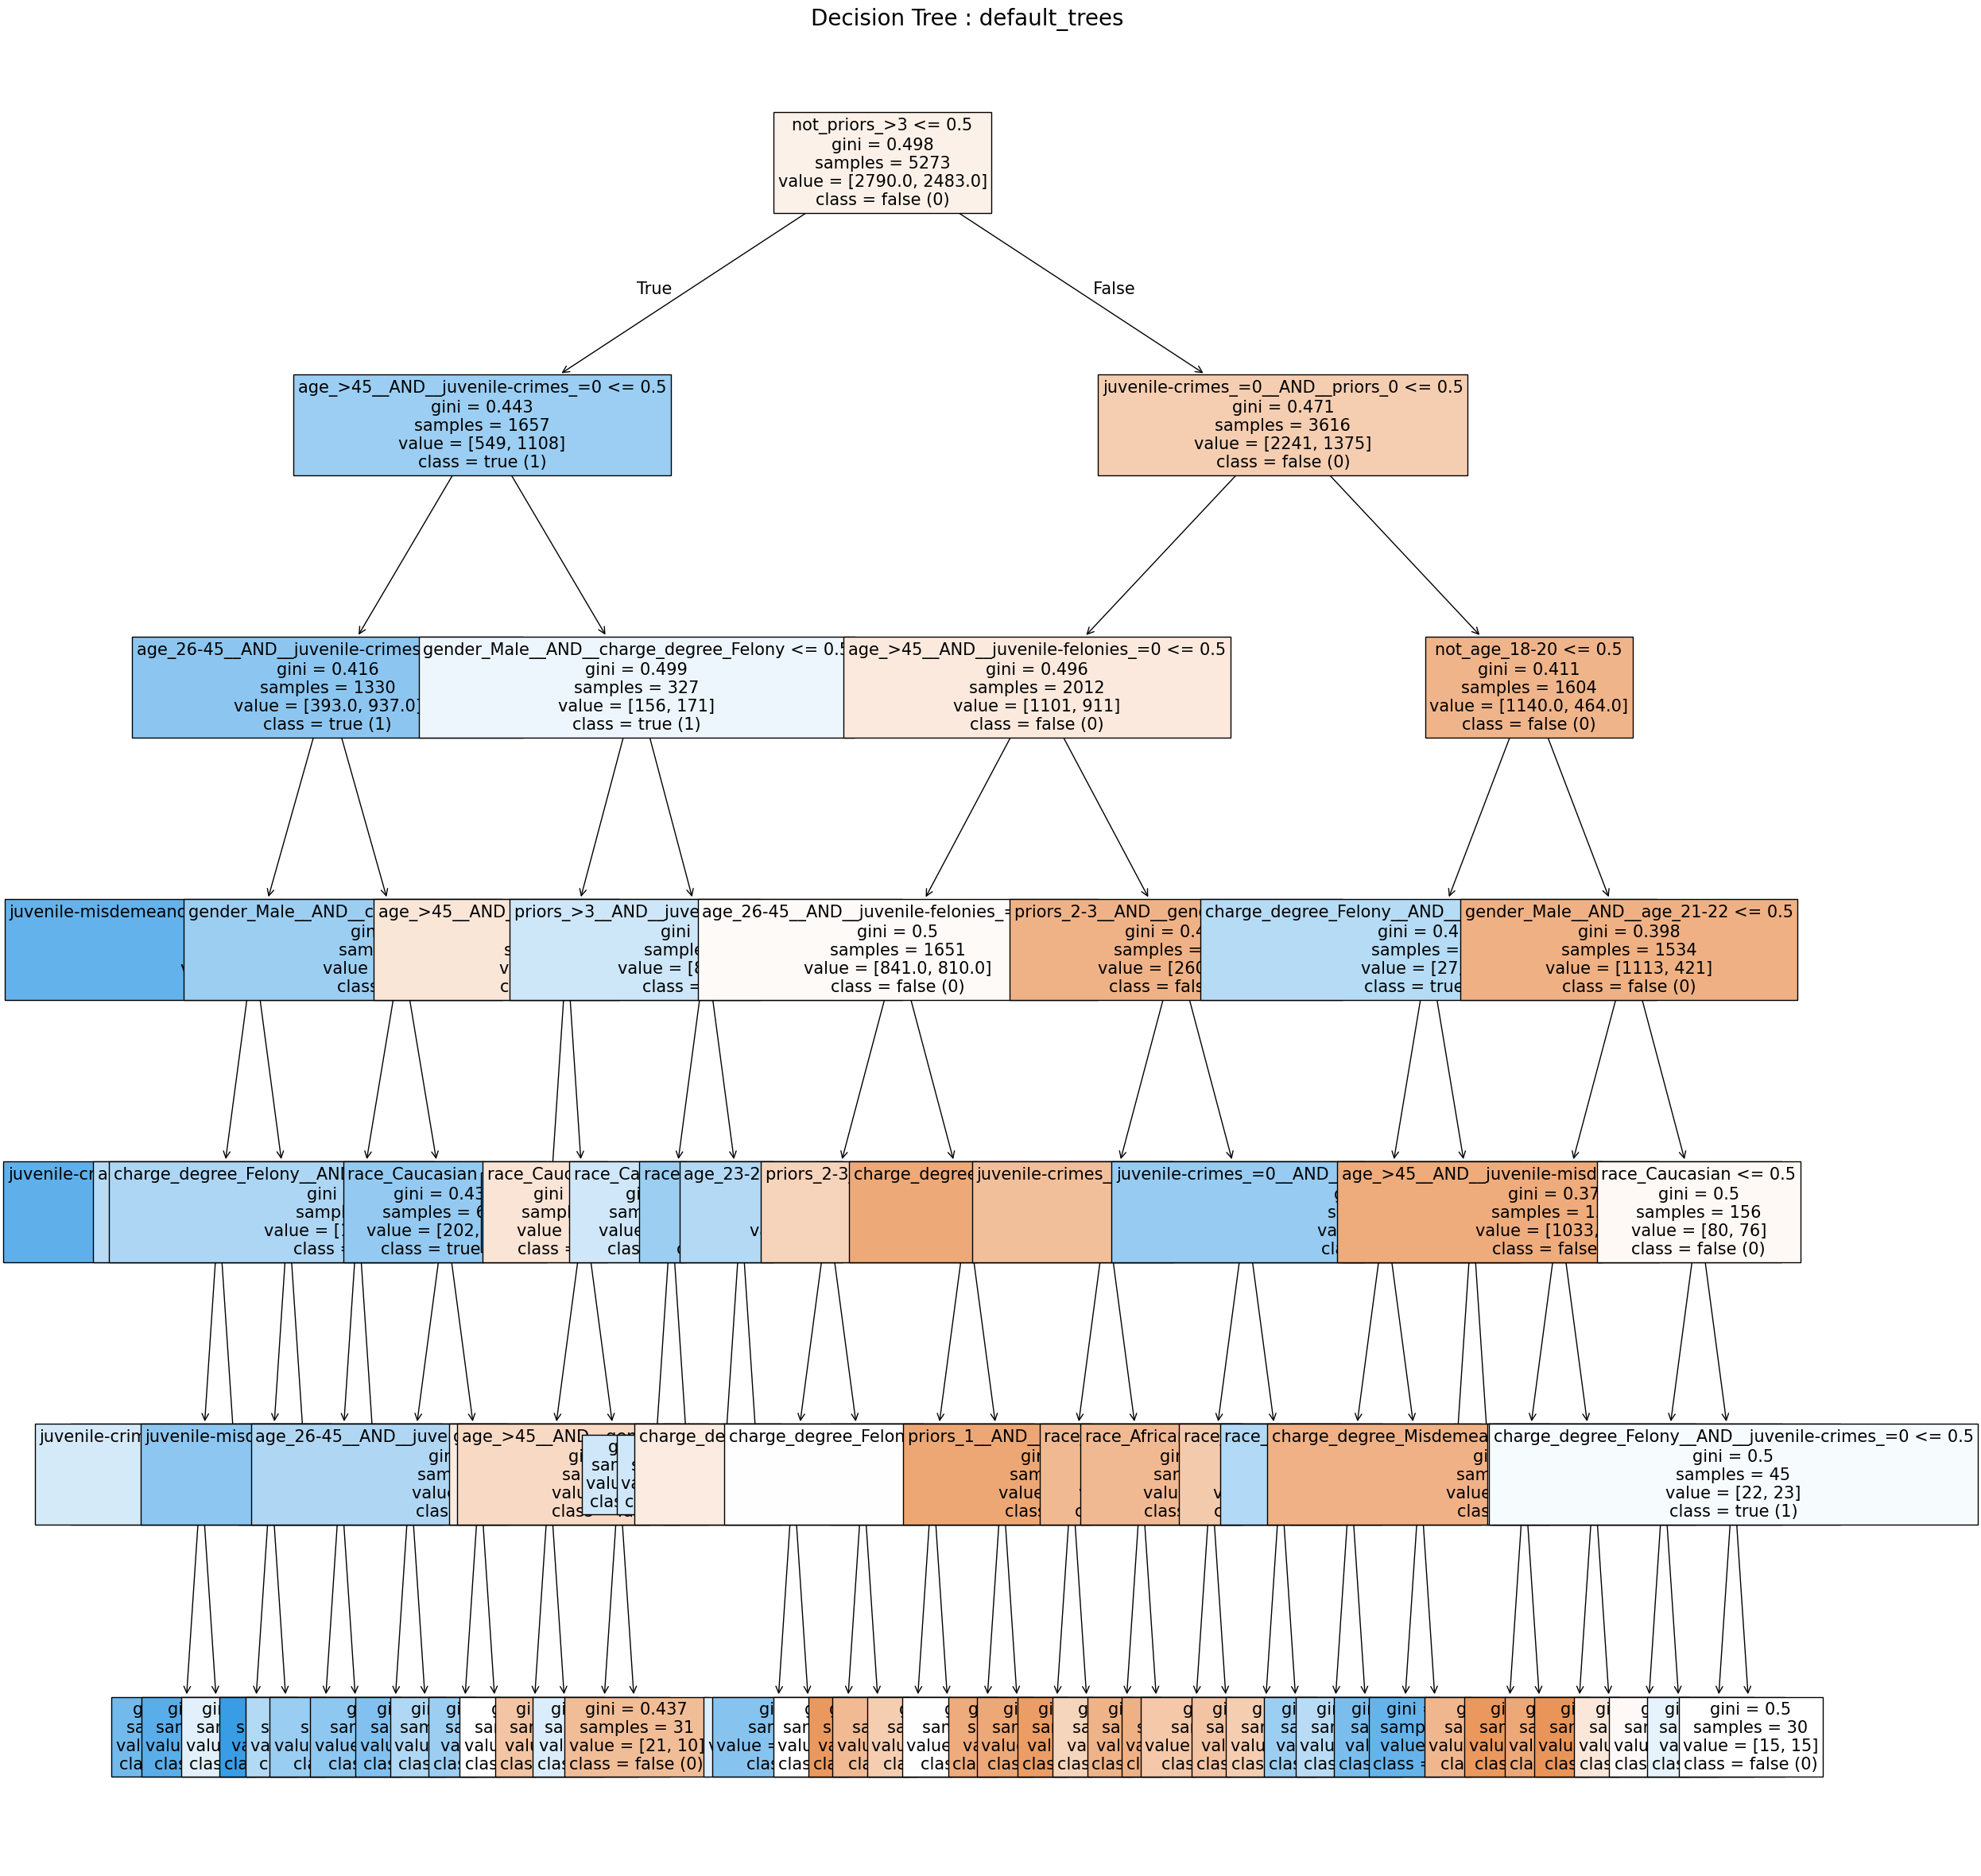

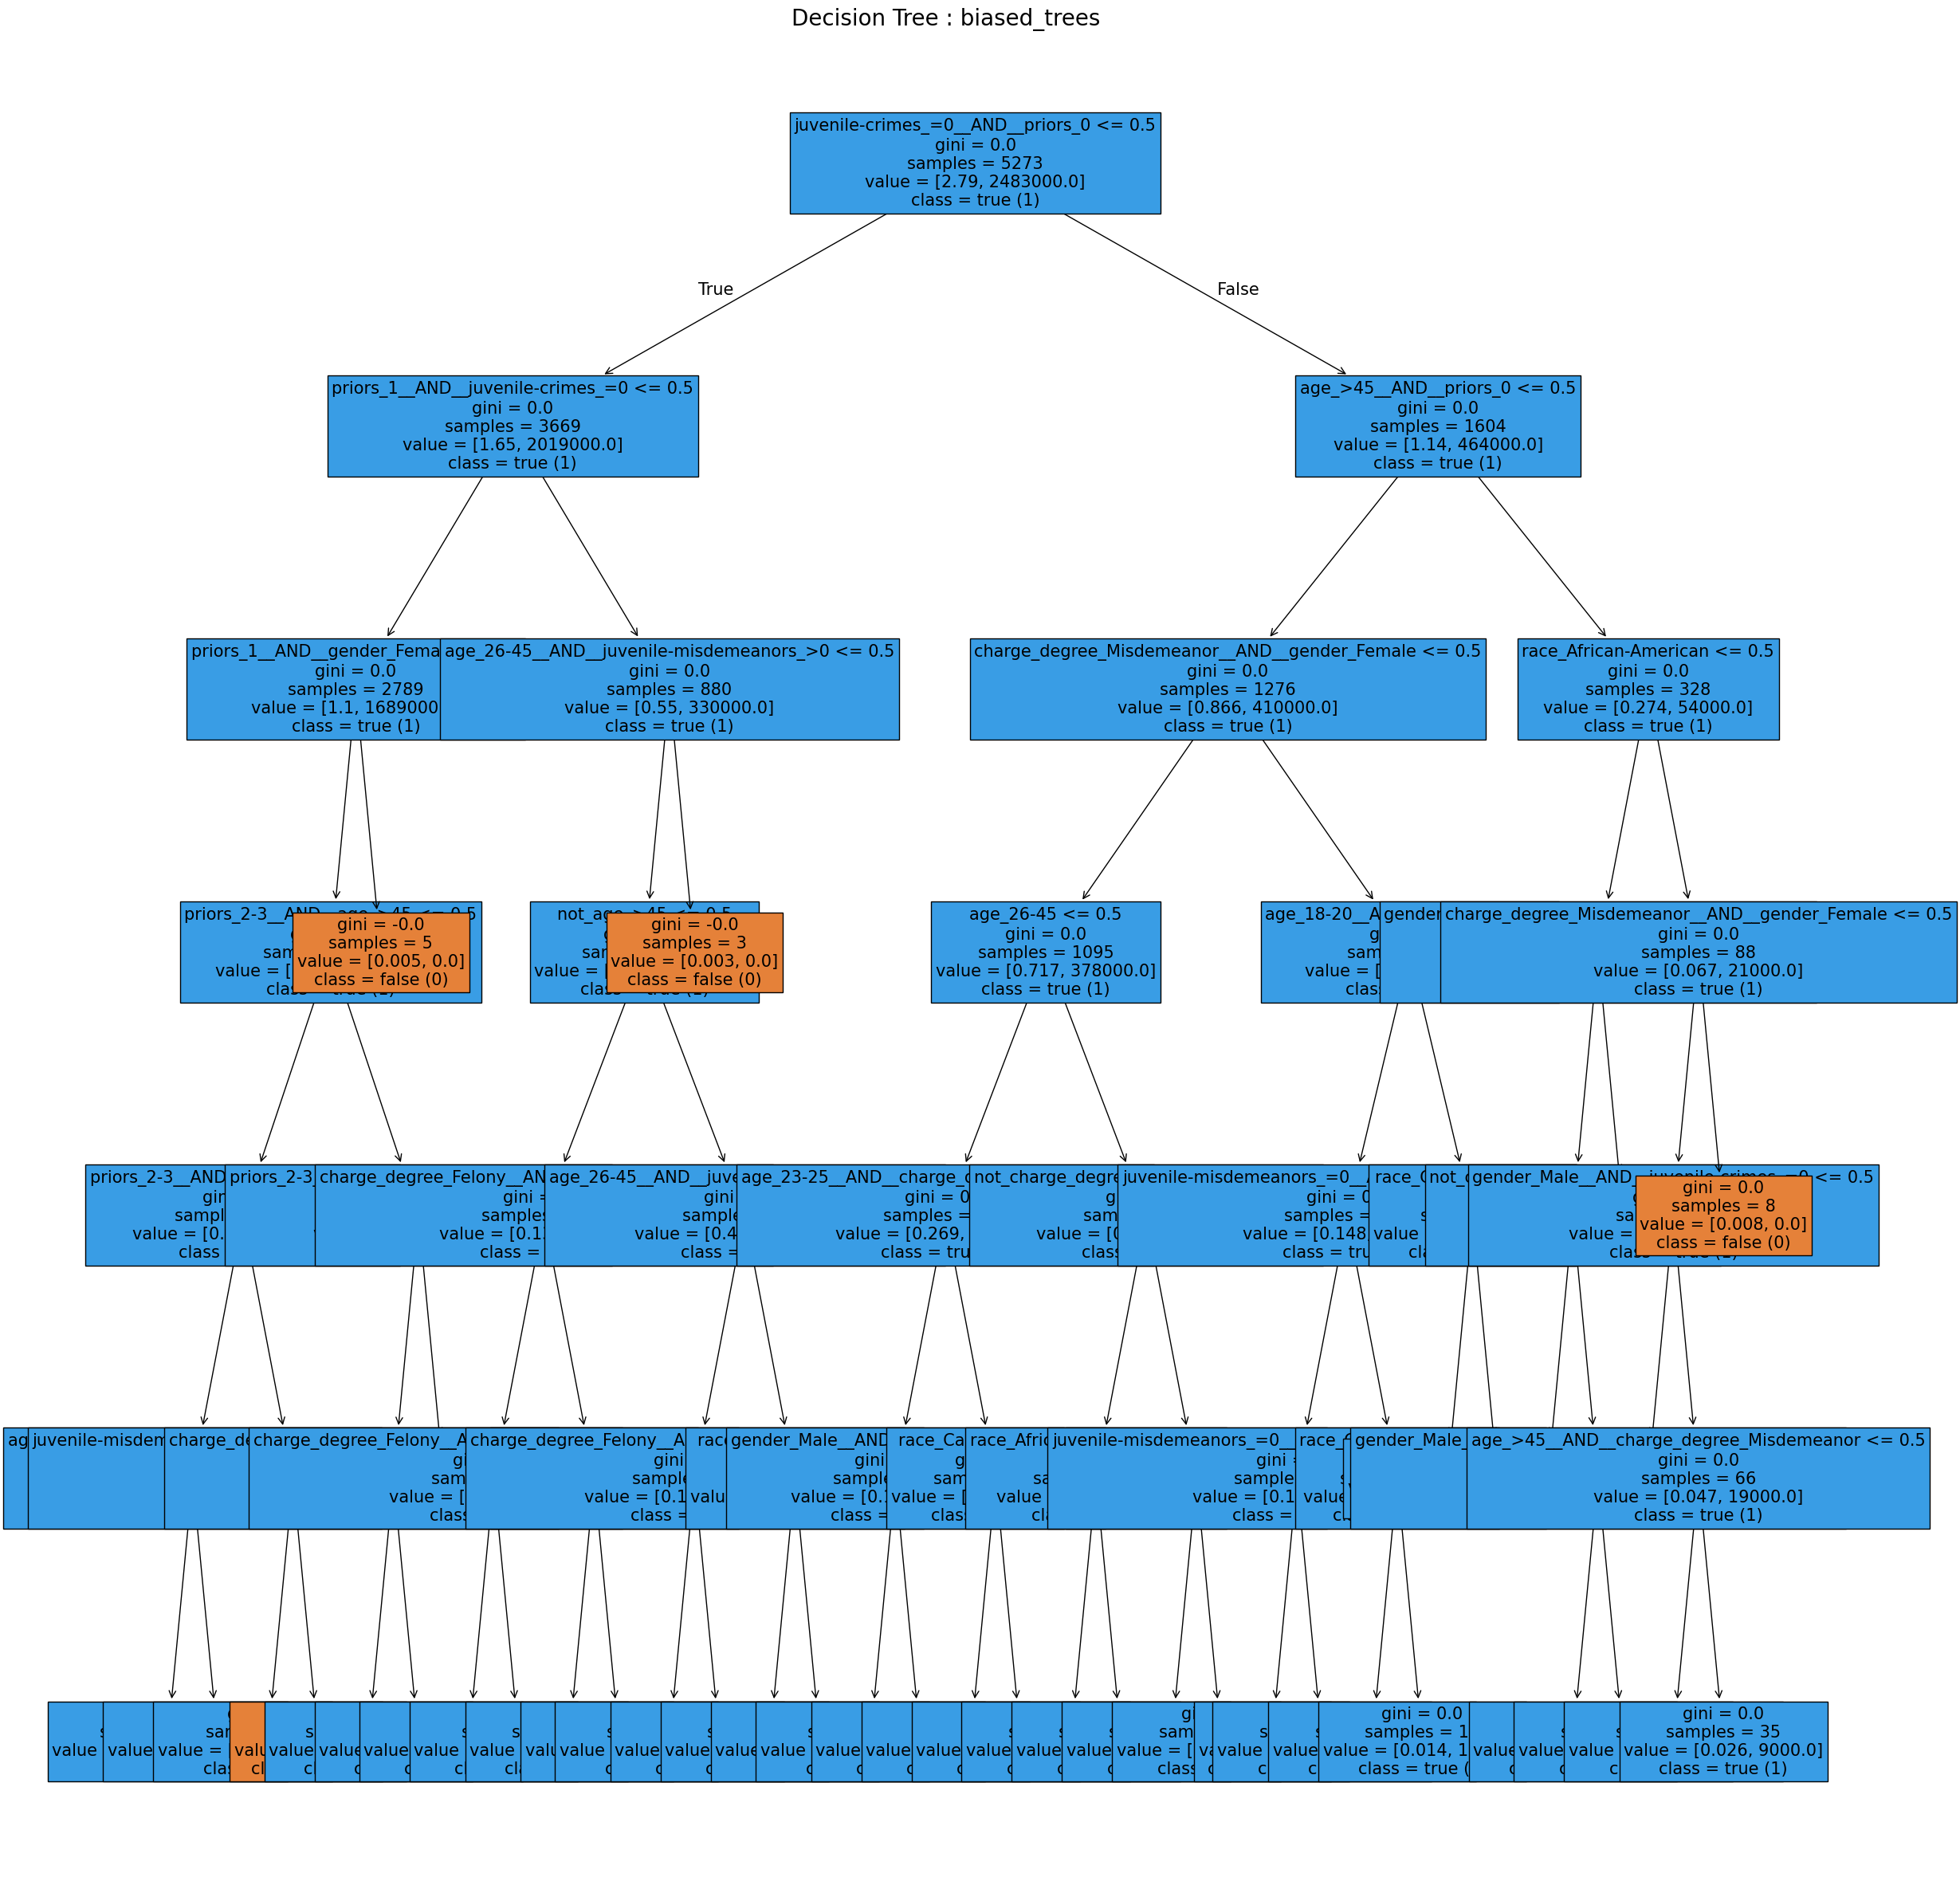

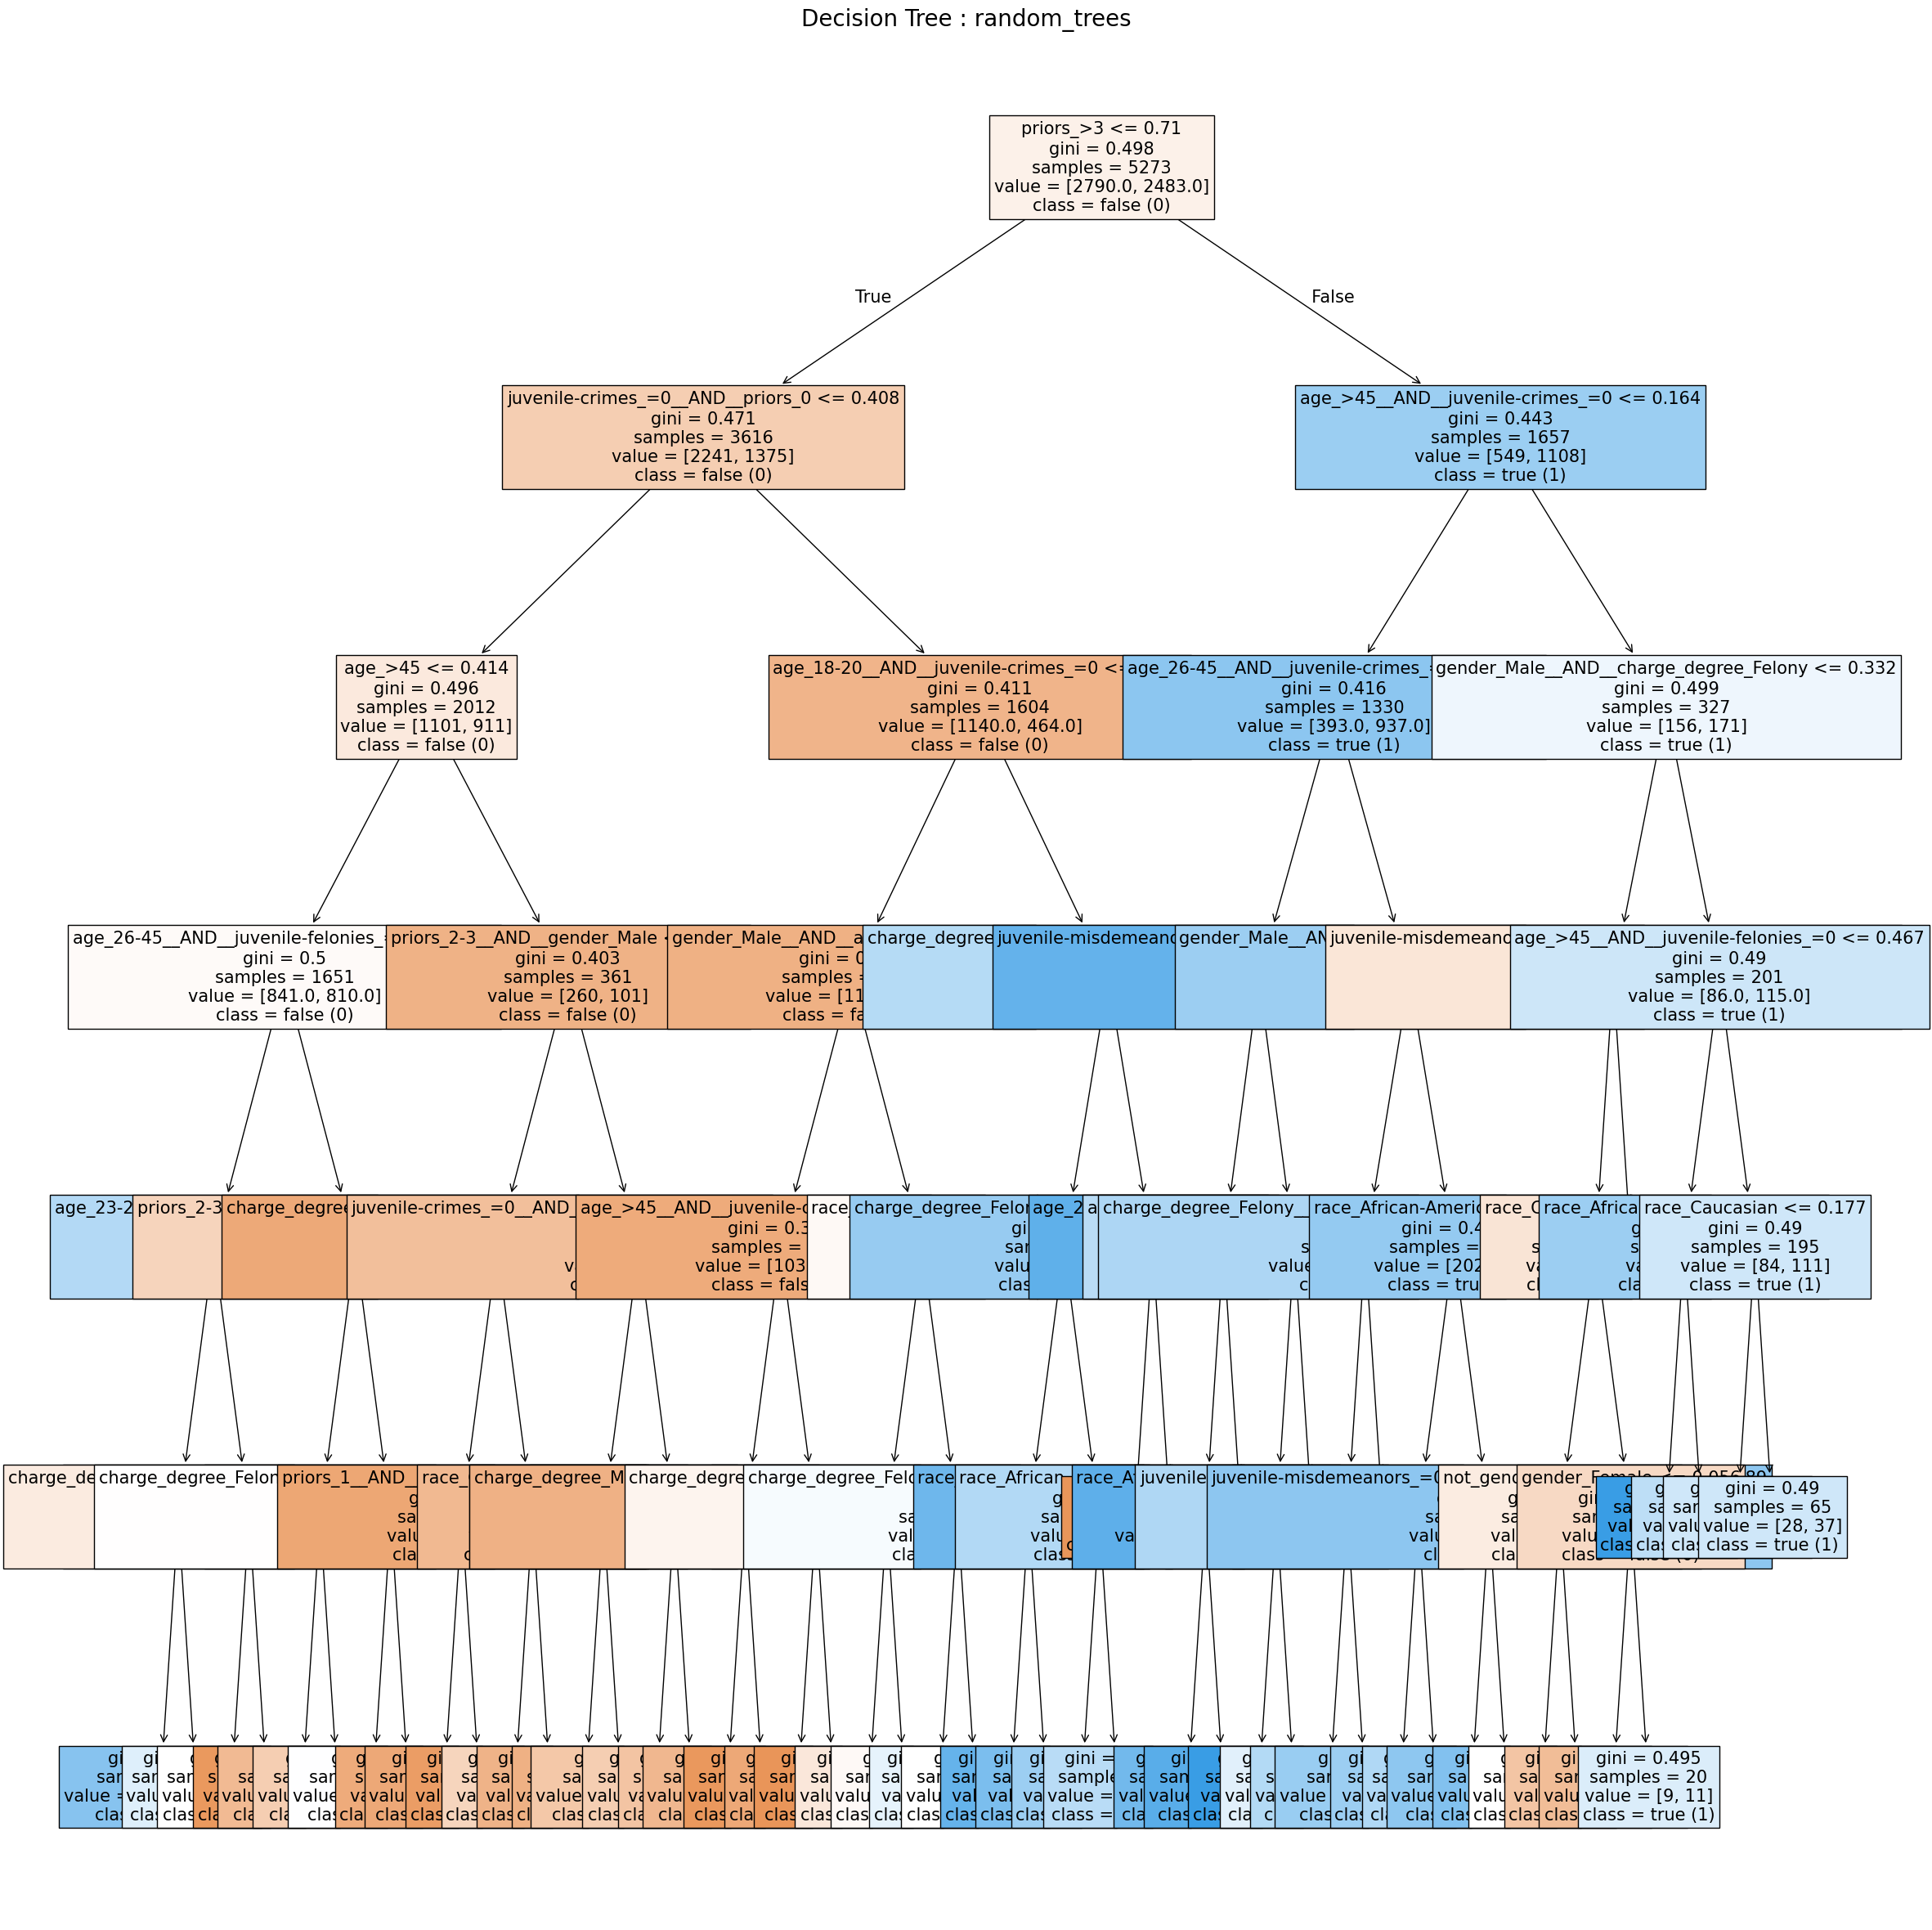

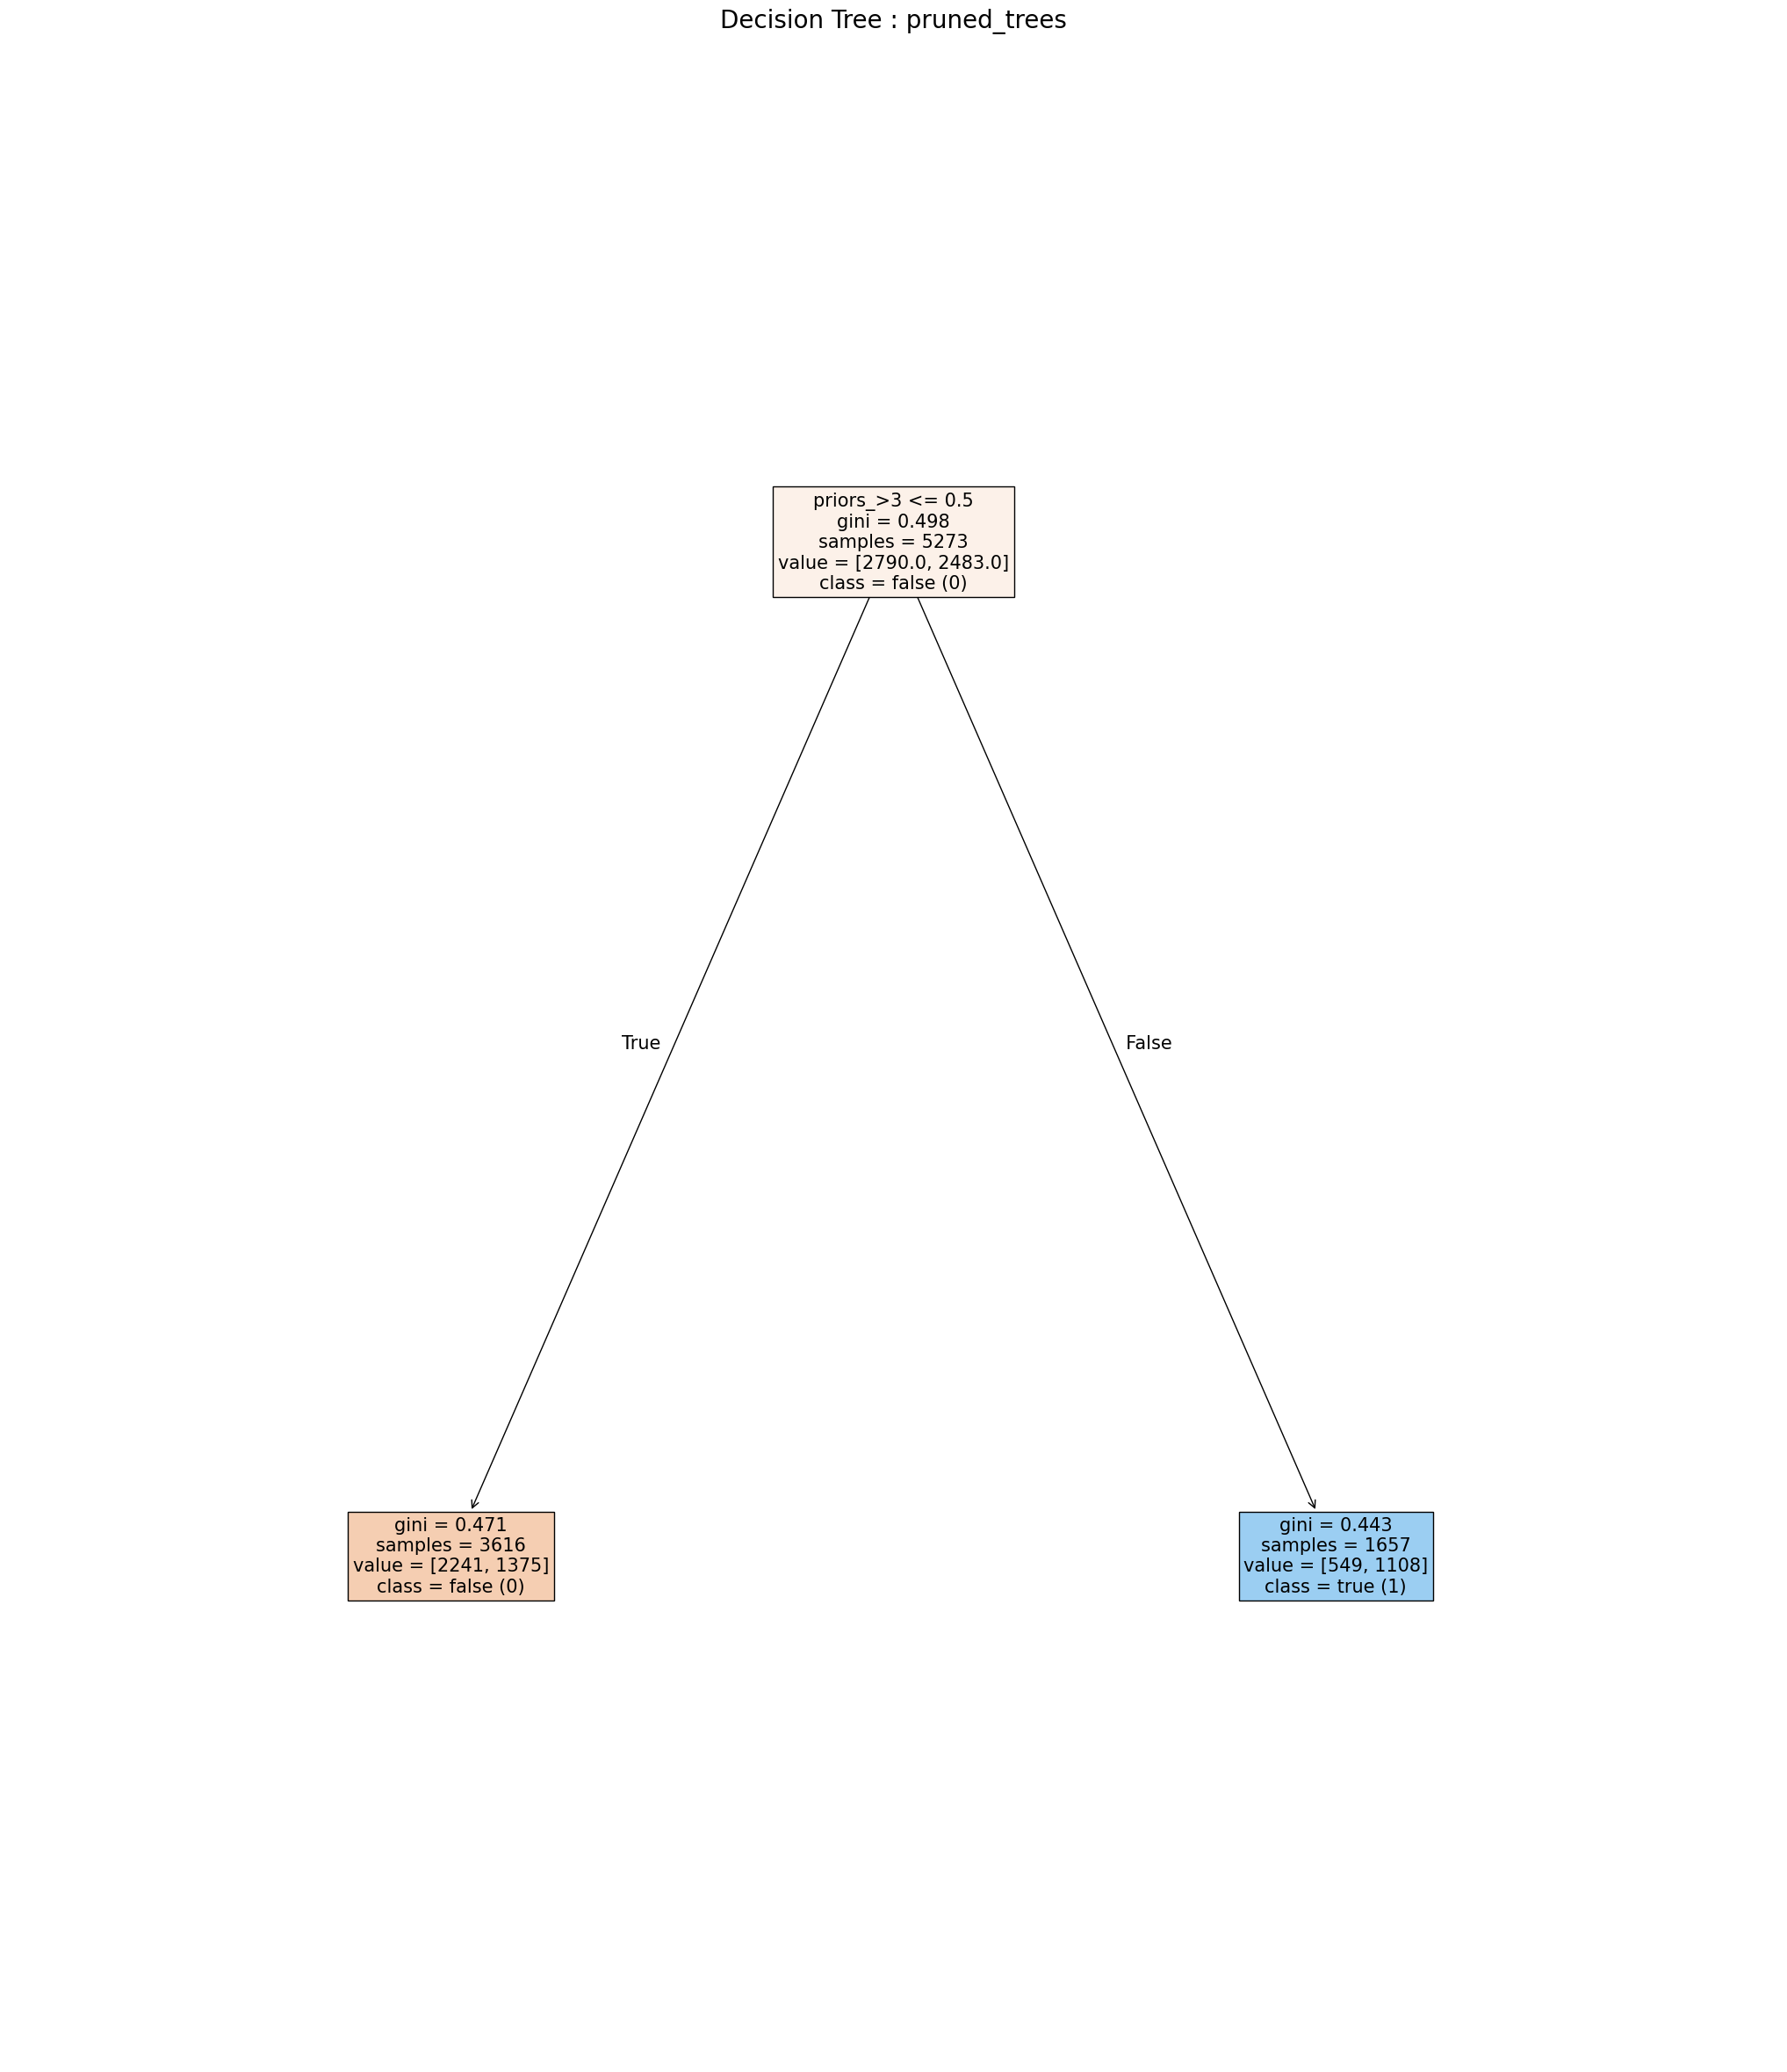

In [ ]:
from utils import load_from_csv
from sklearn import tree
from matplotlib import pyplot as plt

# decision tree to predict the feature 'two_year_recid'
X, y, features, prediction_name = load_from_csv("compass.csv")

configurations = [baby_trees, ten_cluster_trees, default_trees, biased_trees, random_trees ,purned_trees ]
config_names = [
    "baby_trees",
    "ten_cluster_trees",
    "default_trees",
    "biased_trees",
    "random_trees",
    "pruned_trees"
]

for config,name in zip(configurations,config_names):  # for the association of each name with its configuration  
    clf=tree.DecisionTreeClassifier(**config)
    clf=clf.fit(X, y)
    fig=plt.figure(figsize=(26,30))
    _ =tree.plot_tree(clf,
                       feature_names=features,
                       class_names=("false (0)", "true (1)"),
                       filled=True,
                       fontsize=15)
    plt.title(f"Decision Tree : {name}", fontsize=20)
     


Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import numpy as np

# Picking baby_tree and biased_tree
baby_trees={"max_depth": 1}
biased_trees={"class_weight": {0: 0.001, 1: 1000}, "max_depth": 6}

babyclf=tree.DecisionTreeClassifier(**baby_trees)
biasedclf=tree.DecisionTreeClassifier(**biased_trees)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Cross-validation scores (training accuracy via 5-fold CV)
baby_scores = cross_val_score(babyclf, X_train, y_train, cv=5)
biased_scores = cross_val_score(biasedclf, X_train, y_train, cv=5)

# Fit models on full training set
babyclf.fit(X_train, y_train)
biasedclf.fit(X_train, y_train)

# Test accuracy
baby_test_acc = babyclf.score(X_test, y_test)
biased_test_acc = biasedclf.score(X_test, y_test)

# Print results
print(f"baby tree → mean CV training accuracy: {np.mean(baby_scores):.3f}")
print(f"baby tree → test accuracy: {baby_test_acc:.3f}")

print(f"biased tree → mean CV training accuracy: {np.mean(biased_scores):.3f}")
print(f"biased tree → test accuracy: {biased_test_acc:.3f}")


baby tree → mean CV training accuracy: 0.632
baby tree → test accuracy: 0.647
biased tree → mean CV training accuracy: 0.471
biased tree → test accuracy: 0.490


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

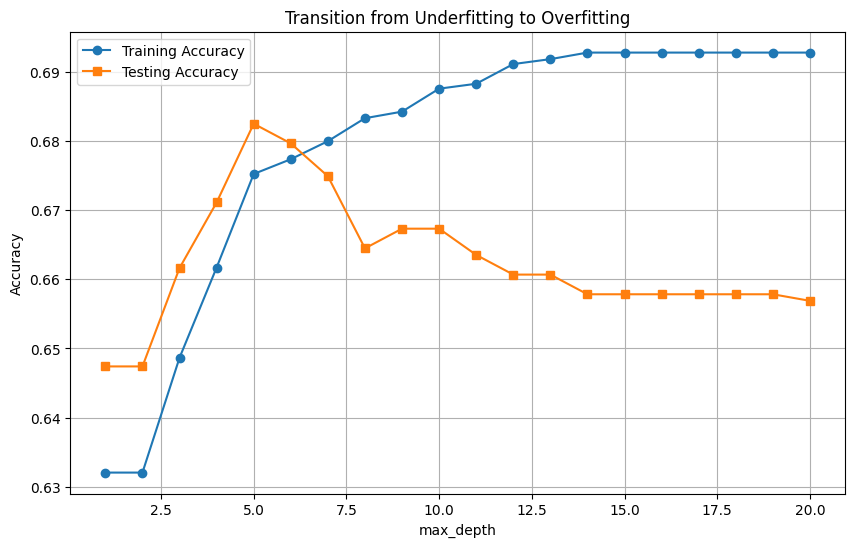

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

train_scores=[]
test_scores=[]
max_depth_values=range(1, 21)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

for depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    
    train_acc=clf.score(X_train, y_train)
    test_acc=clf.score(X_test, y_test)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)

plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Transition from Underfitting to Overfitting')
plt.legend()
plt.grid(True)
plt.show()


Increasing **max_depth** reduces bias (→ better fit on training data) but increases variance (→ poorer generalization).

The plot demonstrates the bias-variance tradeoff:
Left: high bias, low variance
Middle: balanced
Right: low bias, high variance

**Best depth** for this dataset is likely around max_depth = 5 to max_depth = 7, where test accuracy is maximized.

**Optimal phase** (middle, depth 5-7):
Testing accuracy peaks around max_depth = 5 (~68.2%).
Training accuracy and testing accuracy are close, indicating a good balance between bias and variance.

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

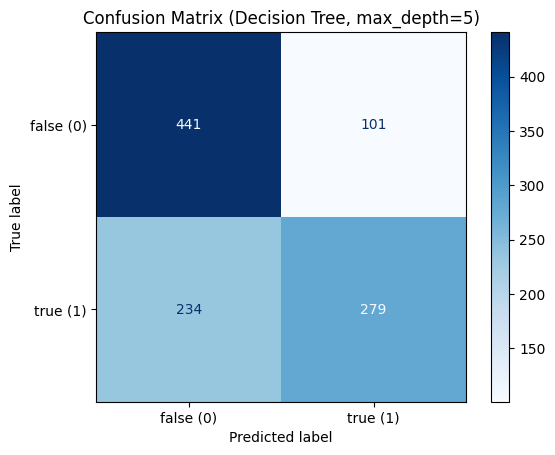

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#we used the best configuration 
good_config = {"max_depth": 5}

# Train-test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1)

# Train the model
clf=tree.DecisionTreeClassifier(**good_config)
clf.fit(X_train,y_train)

# Predict on test set
y_pred=clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

#shpw (thr plot)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["false (0)","true (1)"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Decision Tree, max_depth=5)")
plt.show()


## Interpretation of the Confusion Matrix (Decision Tree, **max_depth=5**)

|                      | Predicted No Recidivism (0) | Predicted Recidivism (1) |
|---------------------|----------------------------|-------------------------|
| **Actual No Recid. (0)** | 441 (True Negatives)       | 101 (False Positives)    |
| **Actual Recid. (1)**    | 234 (False Negatives)      | 279 (True Positives)     |

---

### **Results:**

- **True Negatives (441):** : (**81.4%**)
- 
- **True Positives (279):** ( **54.4%**).

- **False Negatives (234):** (model failed to identify **45.6%** of them).
- 
- **False Positives (101):**  

### **Model performance:**

- **Accuracy:**
  
  $$
  Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{279 + 441}{279 + 441 + 101 + 234} \approx 71.8\%
  $$
    
- **Recall (recidivists):**
 $$
  Recall = \frac{TP}{TP + FN} = \frac{279}{279 + 234} \approx 54.4\%
  $$

- **Specificity (non-recidivists):**
 $$
  Specificity = \frac{TN}{TN + FP} = \frac{441}{441 + 101} \approx 81.4\%
  $$

---

### **Interpretation:**

 The model is **better at predicting non-recidivists (class 0)** than recidivists (class 1).  
but It **misses about 46% of recidivists** (false negatives = 234).  
It makes relatively **few false positives** (101 individuals wrongly labeled as high risk).

Depending on the application:
- If reducing **false negatives** is critical (public safety), we may need to improve recall.
- If reducing **false positives** is critical (fairness), the model performs reasonably well.


### Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

The global FPR (18.6%) **does not** tell us if the model is fair across subgroups (e.g., African-American vs Caucasian).
so that we will Split test data into groups (African-American vs Caucasian, male vs female and also between africain-American-male and africain-Americain-female ). and we will see if our model is fair 

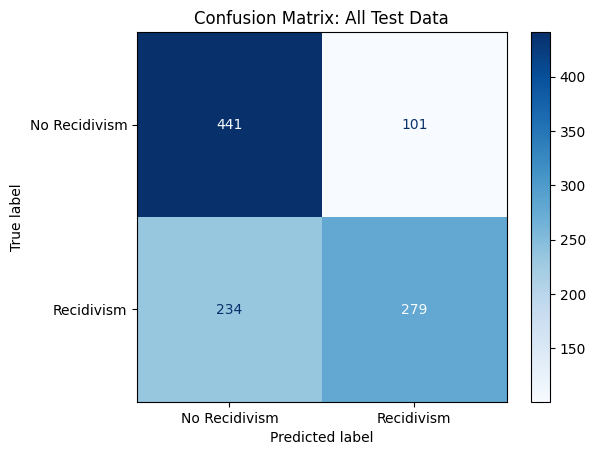

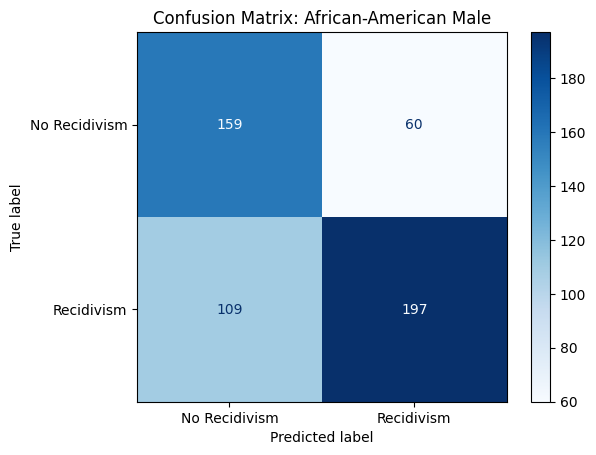

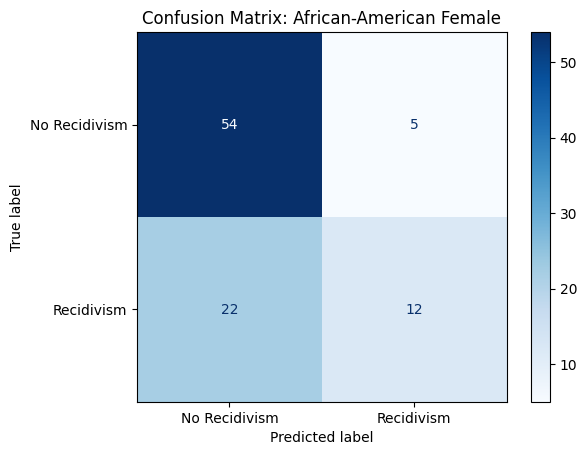

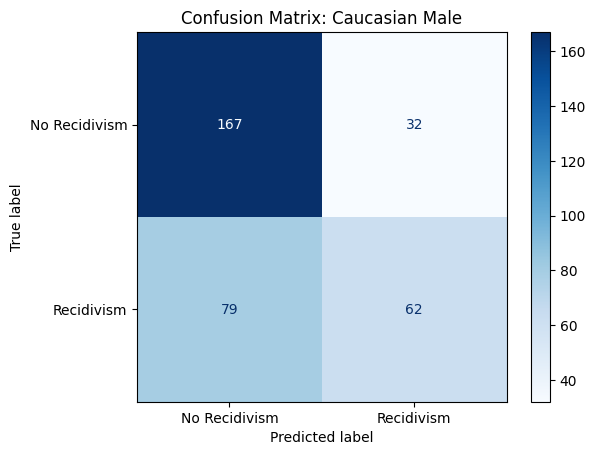

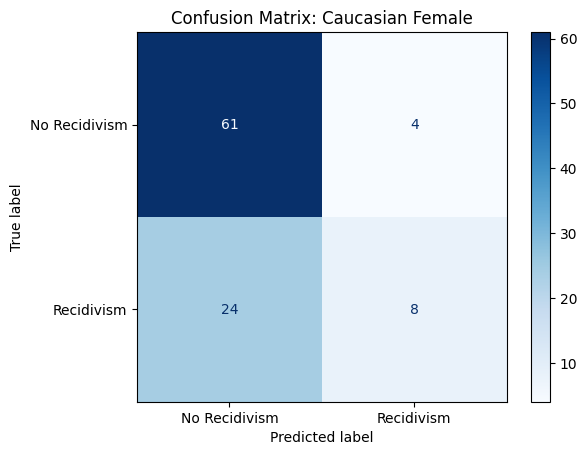

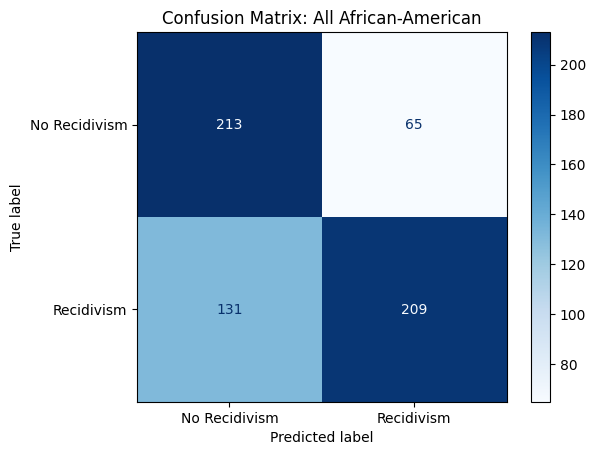

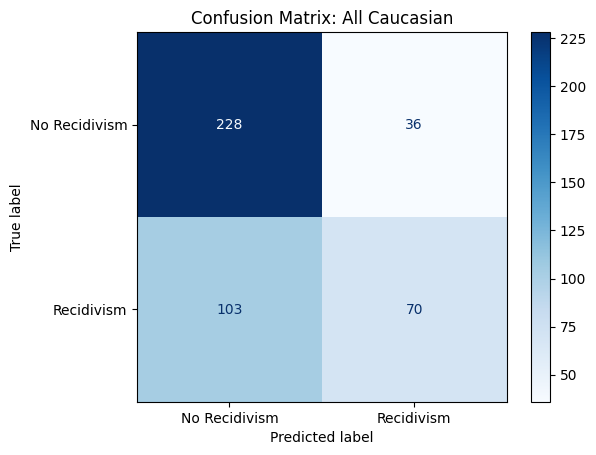

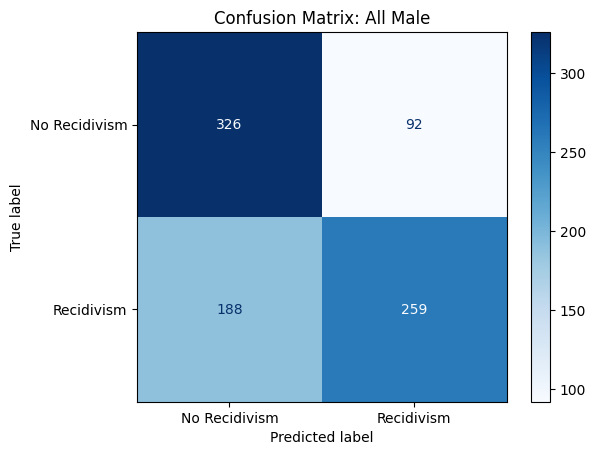

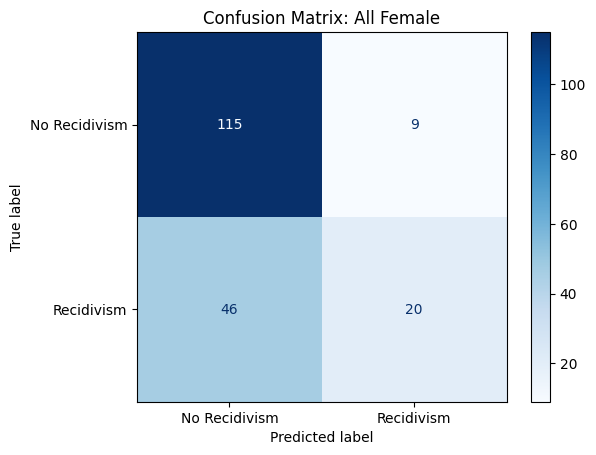

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df=pd.read_csv("./compass.csv")

# Load features and target
X=df.drop(columns=['two_year_recid'])
y=df['two_year_recid']

race_columns=[col for col in df.columns if col.startswith('race_')]
gender_columns=[col for col in df.columns if col.startswith('gender_')]

# Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Predict
y_pred=clf.predict(X_test)

# Prepare test results
test_results=X_test.copy()
test_results['y_true'] = y_test.values
test_results['y_pred'] = y_pred

# Define groups to plot
groups_to_plot = {
    'All Test Data': test_results.index,  # entire test set and then we specify the groups
    'African-American Male': (test_results['race_African-American'] == 1) & (test_results['gender_Male'] == 1),
    'African-American Female': (test_results['race_African-American'] == 1) & (test_results['gender_Female'] == 1),
    'Caucasian Male': (test_results['race_Caucasian'] == 1) & (test_results['gender_Male'] == 1),
    'Caucasian Female': (test_results['race_Caucasian'] == 1) & (test_results['gender_Female'] == 1),
    'All African-American': (test_results['race_African-American'] == 1),
    'All Caucasian': (test_results['race_Caucasian'] == 1),
    'All Male': (test_results['gender_Male'] == 1),
    'All Female': (test_results['gender_Female'] == 1)
}

# Plot of confusion matrix for each group
for group_name, condition in groups_to_plot.items():
    if isinstance(condition, pd.Index):
        group =test_results.loc[condition]
    else:
        group =test_results[condition]

        
    y_true_group =group['y_true']
    y_pred_group =group['y_pred']
    cm = confusion_matrix(y_true_group, y_pred_group, labels=[0,1])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Recidivism', 'Recidivism'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {group_name}")
    plt.show()


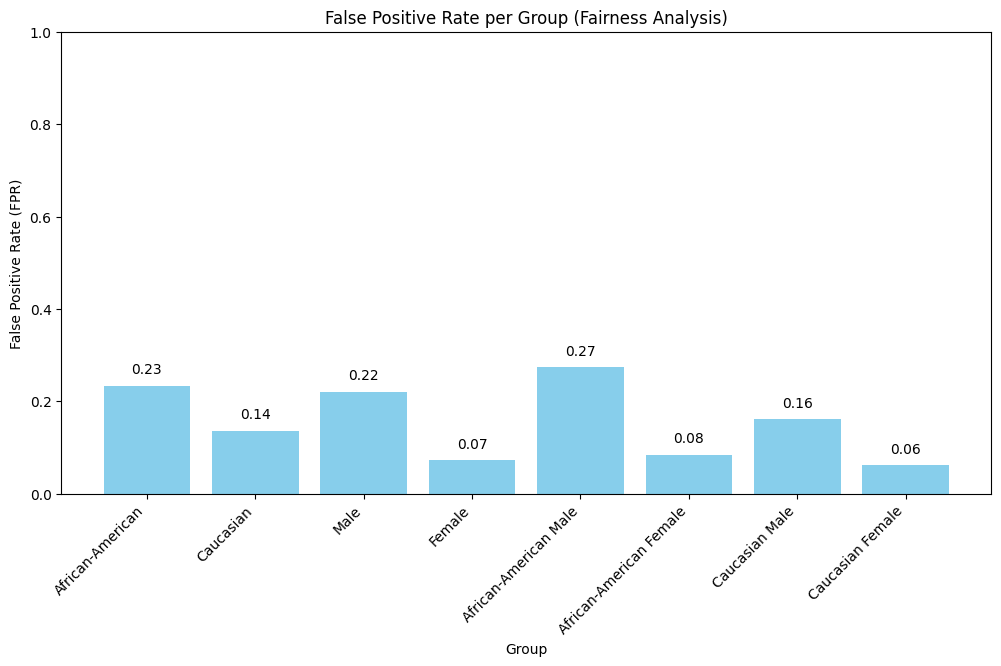

In [9]:
groups_to_evaluate = {
    'African-American': (test_results['race_African-American'] == 1),
    'Caucasian': (test_results['race_Caucasian'] == 1),
    'Male': (test_results['gender_Male'] == 1),
    'Female': (test_results['gender_Female'] == 1),
    'African-American Male': (test_results['race_African-American'] == 1) & (test_results['gender_Male'] == 1),
    'African-American Female': (test_results['race_African-American'] == 1) & (test_results['gender_Female'] == 1),
    'Caucasian Male': (test_results['race_Caucasian'] == 1) & (test_results['gender_Male'] == 1),
    'Caucasian Female': (test_results['race_Caucasian'] == 1) & (test_results['gender_Female'] == 1)
}
# Compute FPR for each group
fpr_values = {}

for group_name, mask in groups_to_evaluate.items():
    group = test_results[mask]
    if len(group) == 0:
        fpr_values[group_name] = None
        continue
    cm = confusion_matrix(group['y_true'], group['y_pred'], labels=[0,1])
    if cm.shape == (2,2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn =cm[0,0] if cm.shape[0]>0 and cm.shape[1]>0 else 0
        fp =cm[0,1] if cm.shape[0]>0 and cm.shape[1]>1 else 0
        fn =cm[1,0] if cm.shape[0]>1 and cm.shape[1]>0 else 0
        tp =cm[1,1] if cm.shape[0]>1 and cm.shape[1]>1 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fpr_values[group_name] = fpr

# Prepare data for plot
groups = list(fpr_values.keys())
fpr_scores = [fpr_values[g] if fpr_values[g] is not None else 0 for g in groups]

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(groups, fpr_scores, color='skyblue')
plt.ylabel('False Positive Rate (FPR)')
plt.xlabel('Group')
plt.title('False Positive Rate per Group (Fairness Analysis)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.show()

So as we can see our model shows a clear disparity in False Positive Rate across groups. African-American males have the highest FPR (27%), while Caucasian females have the lowest (6%). Overall, the model tends to falsely predict recidivism more often for African-American individuals and for males. This indicates potential bias and raises fairness concerns regarding race and gender in the model’s predictions.
